this notebook is to just plot what was downloaded in 01_download.ipynb to check what was downloaded.

In [1]:
!pip install pandas mplfinance ipywidgets

In [ ]:
import pandas as pd
import mplfinance as mpf
import logging
import os

# Set up basic logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Configuration
DATA_DIR = './stock_data/'

load data

In [3]:
TICKER = 'SPY'  # Specify your ticker here

# Load CSV
csv_path = os.path.join(DATA_DIR, f'{TICKER}.csv')
try:
    df = pd.read_csv(csv_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    logger.info(f'Loaded {len(df)} records for {TICKER} from {csv_path}')
except Exception as e:
    logger.error(f'Error loading {TICKER}: {e}')
    df = pd.DataFrame()

df

2025-06-14 14:26:55,616 - INFO - Loaded 297230 records for SPY from ./stock_data/SPY.csv


,timestamp,open,high,low,close,volume,vwap,transactions,otc
0,2003-09-10 08:03:00,102.86,102.86,102.86,102.86,1000.0,102.86,1,NaN
1,2003-09-10 08:05:00,102.86,102.86,102.86,102.86,500.0,102.86,1,NaN
2,2003-09-10 08:06:00,102.88,102.88,102.88,102.88,1000.0,102.88,2,NaN
3,2003-09-10 08:09:00,102.90,102.90,102.90,102.90,100.0,102.90,1,NaN
4,2003-09-10 08:11:00,102.90,102.90,102.90,102.90,300.0,102.90,1,NaN
...,...,...,...,...,...,...,...,...,...
297225,2005-12-30 17:39:00,124.52,124.52,124.52,124.52,100.0,124.52,1,NaN
297226,2005-12-30 17:40:00,124.52,124.52,124.52,124.52,1000.0,124.52,3,NaN
297227,2005-12-30 18:18:00,124.52,124.52,124.52,124.52,500.0,124.52,2,NaN
297228,2005-12-30 19:10:00,124.52,124.52,124.52,124.52,100.0,124.52,1,NaN


In [4]:
START_DATE = '2003-09-10'  # Specify start date (YYYY-MM-DD)
END_DATE = '2003-09-20'  # Specify end date (YYYY-MM-DD)

In [5]:
# # advance the time by one week
# START_DATE = pd.to_datetime(START_DATE) + pd.Timedelta(days=7)
# END_DATE = pd.to_datetime(END_DATE) + pd.Timedelta(days=7)

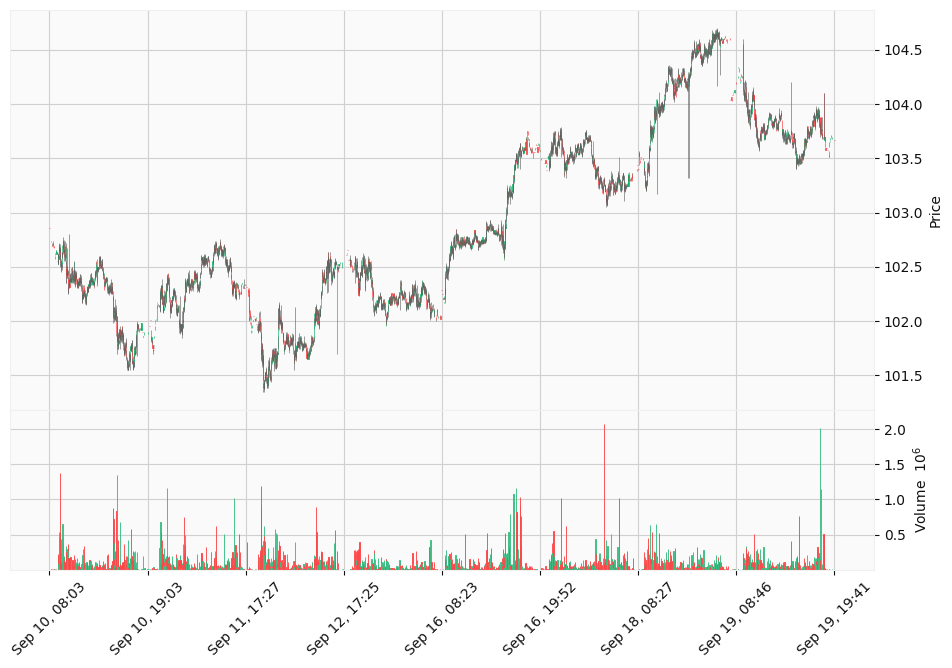

2025-06-14 14:26:57,953 - INFO - Plotted candlestick chart for SPY from 2003-09-10 to 2003-09-20


In [6]:

# Filter by date range
df_slice = df[(df['timestamp'] >= START_DATE) & (df['timestamp'] <= END_DATE)]
# Prepare data for plotting
df_slice.set_index('timestamp', inplace=True)
df_slice = df_slice[['open', 'high', 'low', 'close', 'volume']]
# Plot candlestick chart
mpf.plot(
    df_slice,
    type='candle',
    style='yahoo',
    volume=True,
    warn_too_much_data=1000000,
    figsize=(12, 8),  # Set canvas size (width=12 inches, height=8 inches)
)
logger.info(f'Plotted candlestick chart for {TICKER} from {START_DATE} to {END_DATE}')